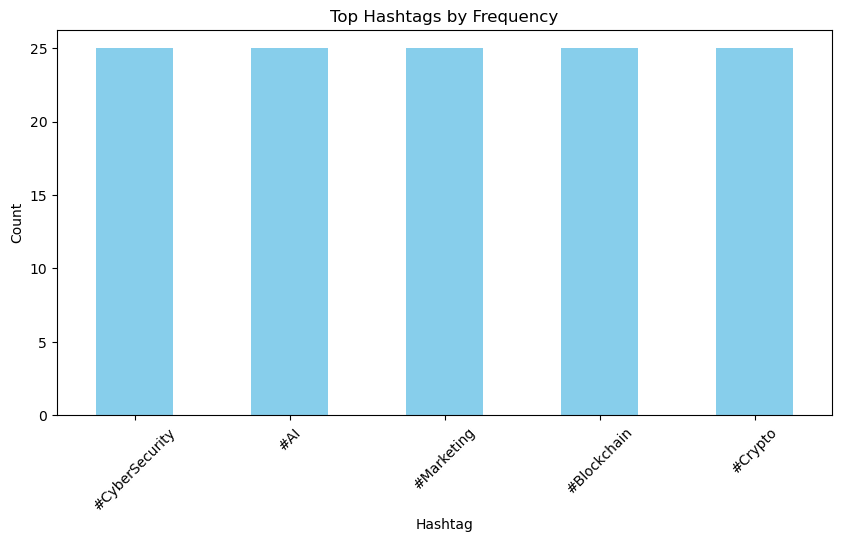

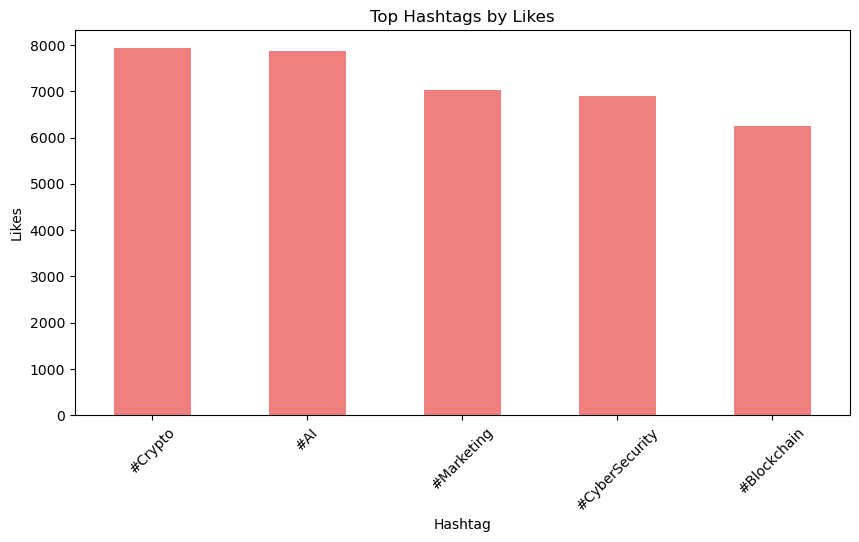

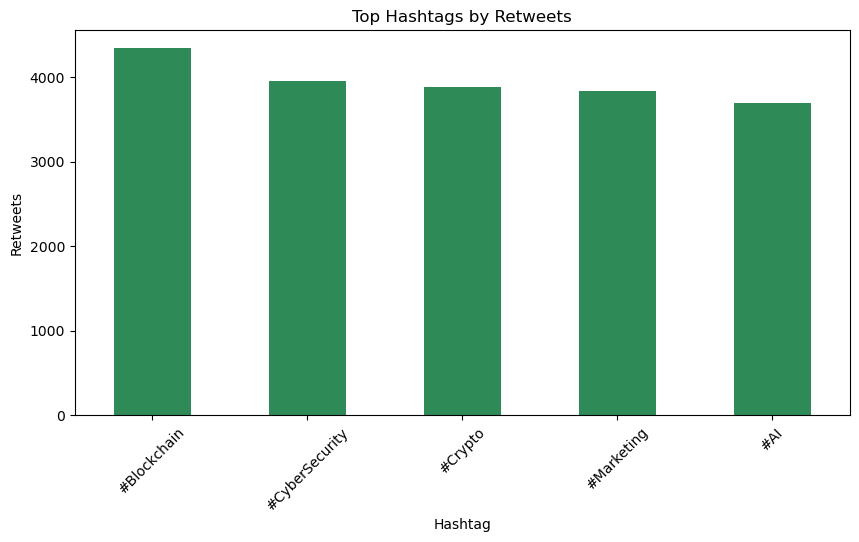

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("twitter_large_dataset.csv")

# Function to extract hashtags
def extract_hashtags(tweet):
    return re.findall(r'#\w+', tweet)

df['Hashtags'] = df['Tweet'].apply(extract_hashtags)

# Flatten hashtag list
all_hashtags = [hashtag for hashtags in df['Hashtags'] for hashtag in hashtags]

# Frequency distribution
hashtag_counts = Counter(all_hashtags)
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

# Aggregate engagement per hashtag
engagement_data = []
for index, row in df.iterrows():
    for hashtag in row['Hashtags']:
        engagement_data.append({'Hashtag': hashtag, 'Likes': row['Likes'], 'Retweets': row['Retweets']})

engagement_df = pd.DataFrame(engagement_data)
aggr_engagement = engagement_df.groupby('Hashtag').sum().reset_index()

# Visualization
plt.figure(figsize=(10, 5))
hashtag_df.sort_values(by='Count', ascending=False).head(10).plot(
    x='Hashtag', y='Count', kind='bar', legend=False, color='skyblue', ax=plt.gca()
)
plt.title("Top Hashtags by Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
aggr_engagement.sort_values(by='Likes', ascending=False).head(10).plot(
    x='Hashtag', y='Likes', kind='bar', legend=False, color='lightcoral', ax=plt.gca()
)
plt.title("Top Hashtags by Likes")
plt.ylabel("Likes")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
aggr_engagement.sort_values(by='Retweets', ascending=False).head(10).plot(
    x='Hashtag', y='Retweets', kind='bar', legend=False, color='seagreen', ax=plt.gca()
)
plt.title("Top Hashtags by Retweets")
plt.ylabel("Retweets")
plt.xticks(rotation=45)
plt.show()